<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [96]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [97]:
iris= load_iris()
X=iris['data'][: , 2:]  # petal length and width
y= iris['target']

In [98]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [99]:
# iris.feature_names[2:] 
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

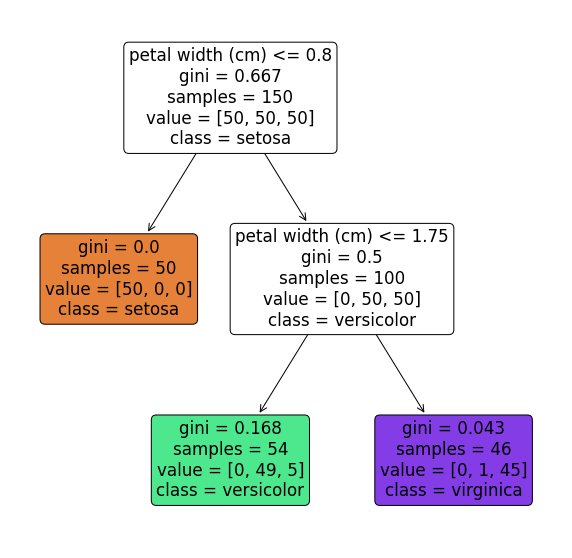

In [100]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))  
_ = tree.plot_tree(dt_clf, feature_names= iris.feature_names[2:] , class_names= iris.target_names,
             filled=True,  rounded = True)
plt.show()



1.   node’s samples attribute counts how many training instances it applies to. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1,
right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A
2. node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-
Versicolor, and 45 Iris-Virginica. Finally, a node’s gini attribute measures its impurity:
3.a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0. Equation 6-1 shows how the training algorithm
computes the gini score Gi of the ith node. For example, the depth-2 left node
has a gini score equal to 1 – (0/54)2 – (49/54)2 – (5/54)2 ≈ 0.168.



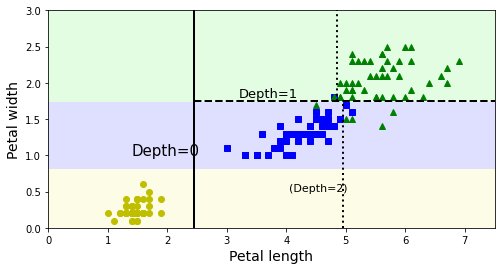

In [101]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(dt_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# save_fig("decision_tree_decision_boundaries_plot")
plt.show()


In [102]:
# iris.target_names[dt_clf.predict([[5,1.5]])]
dt_clf.predict([[5,1.5]])

array([1])

In [103]:
dt_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [104]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Regression

In [105]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt_reg= DecisionTreeRegressor(max_depth=2,random_state=42)
dt_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

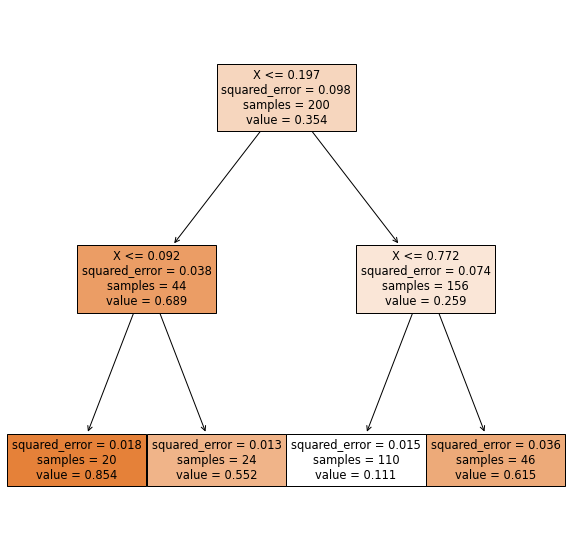

In [107]:
plt.figure(figsize=(10,10))  
_ = tree.plot_tree(dt_reg , feature_names='X' , filled=True )

plt.show()

This tree looks very similar to the classification tree you built earlier. The main difference
is that instead of predicting a class in each node, it predicts a value.

For example,
suppose you want to make a prediction for a new instance with x1 = 0.6. You traverse
the tree starting at the root, and you eventually reach the leaf node that predicts
value=0.1106. This prediction is simply the average target value of the 110 training
instances associated to this leaf node. This prediction results in a Mean Squared Error
(MSE) equal to 0.0151 over these 110 instances.

In [108]:
np.unique(y) 

array([-0.14730893, -0.13739497, -0.12448083, -0.11268613, -0.10001677,
       -0.08973345, -0.07870541, -0.07292209, -0.07042552, -0.06517894,
       -0.06082567, -0.05960353, -0.05657118, -0.04979537, -0.04812958,
       -0.04418394, -0.0411628 , -0.03876859, -0.03250116, -0.01843054,
       -0.01639004, -0.01408219, -0.0083856 , -0.00504175, -0.00435032,
        0.00709114,  0.0072197 ,  0.00901957,  0.01217772,  0.02951154,
        0.03434008,  0.03573183,  0.04233411,  0.04429434,  0.04450614,
        0.05357532,  0.06149939,  0.06299159,  0.06667509,  0.06802374,
        0.070241  ,  0.07650682,  0.08930683,  0.08984115,  0.09111574,
        0.09256181,  0.09276006,  0.09406899,  0.09672854,  0.09996678,
        0.10200265,  0.10259684,  0.10862007,  0.11415008,  0.11467623,
        0.12102648,  0.12874559,  0.12930359,  0.13237945,  0.13997145,
        0.14088892,  0.14436265,  0.14469734,  0.14497116,  0.14763175,
        0.15137029,  0.1518193 ,  0.15200573,  0.15246683,  0.15

# Regulraization & HyperParmaters

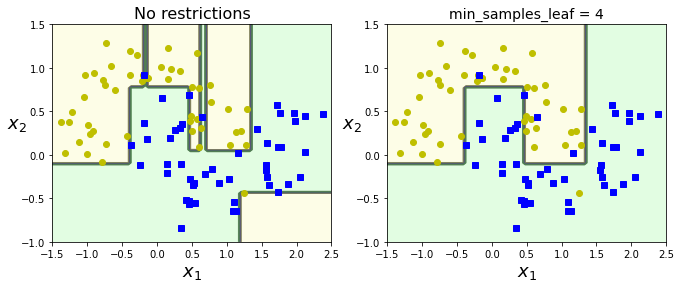

In [112]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

# save_fig("min_samples_leaf_plot")
plt.show()

shows two Decision Trees trained on the moons dataset (introduced in
Chapter 5). On the left, the Decision Tree is trained with the default hyperparameters
(i.e., no restrictions), and on the right the Decision Tree is trained with min_sam
ples_leaf=4. It is quite obvious that the model on the left is overfitting, and the
model on the right will probably generalize better

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

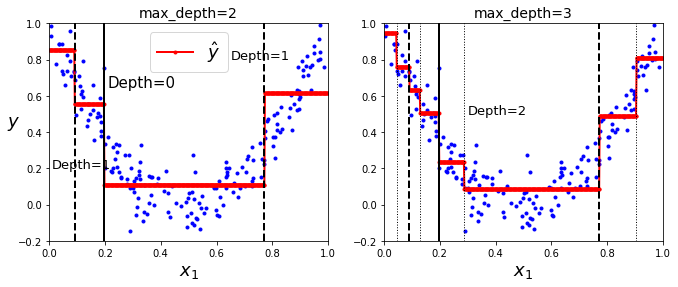

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

# save_fig("tree_regression_plot")
plt.show()

Decision Trees make very few assumptions about the training data (as opposed to linear
models, which obviously assume that the data is linear, for example). If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).
To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.
The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree: min_samples_split (the minimum number of samples
a node must have before it can be split), min_samples_leaf (the minimum number
of samples a leaf node must have), min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (maximum number of leaf nodes), and max_features
(maximum number of features that are evaluated for splitting at each node). Increasing
min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.

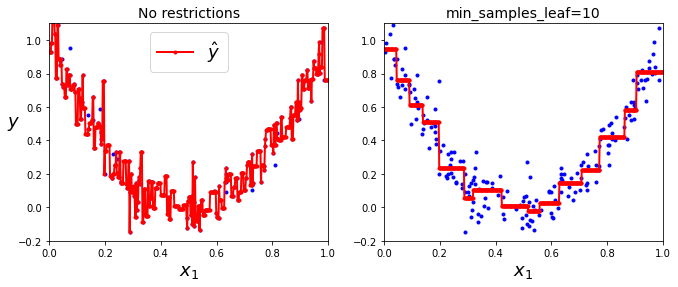

In [113]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

Just like for classification tasks, Decision Trees are prone to overfitting when dealing
with regression tasks. Without any regularization (i.e., using the default hyperparameters),
you get the predictions on the left of Figure. It is obviously overfitting
the training set very badly. Just setting min_samples_leaf=10 results in a much more
reasonable model, represented on the right of Figure 

# Limitations

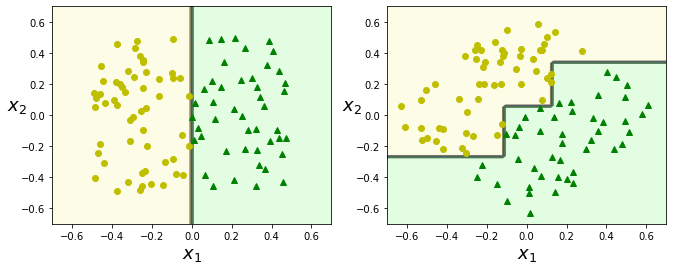

In [114]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# save_fig("sensitivity_to_rotation_plot")
plt.show()



1.   limitations. First, as you may have noticed, Decision
Trees love orthogonal decision boundaries (all splits are perpendicular to an axis),
which makes them sensitive to training set **rotation**. For example, Figure 6-7 shows a
simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily
convoluted. Although both Decision Trees fit the training set perfectly, it is very
likely that the model on the right will not generalize well. One way to limit this problem
is to use PCA



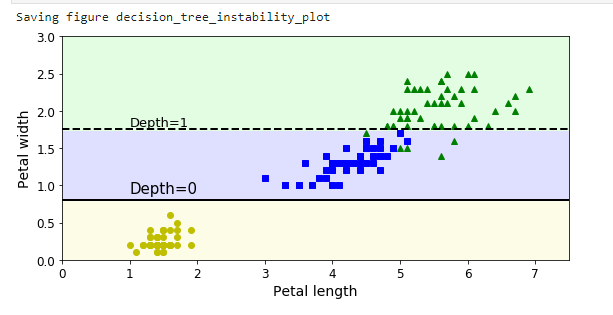

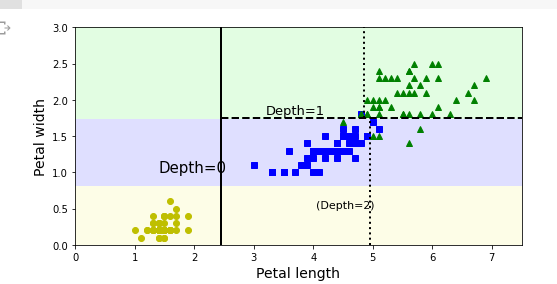

2. More generally, the main issue with Decision Trees is that they are very sensitive to
small variations in the training data. For example, if you just remove the widest Iris-
Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
and train a new Decision Tree, you may get the model represented in Figure 6-8. As
you can see, it looks very different from the previous Decision Tree (Figure 6-2).
Actually, since the training algorithm used by Scikit-Learn is stochastic6 you may
get very different models even on the same training data (unless you set the
random_state hyperparameter).